In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# improt data
op_merged = pd.read_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_inner_4.8.pkl')

In [3]:
op_merged.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...    price_range_loc     busiest_day    busiest_days  \
0         Soda  ...  Mid_range rpoduct  Regularly busy  Regularly busy   
1         Soda  ...  Mid_range rpoduct  Regularly busy      Least busy   
2         Soda  ...  Mid_range rpoduct  Regularly busy      Least busy   
3         Soda  ...  Mid_range rpoduct      Least busy      Least busy   
4         Soda  ...  Mid_range rpoduct      Least busy      Least busy   

  busiest_period_of_day max_number  loyalty_flag user_purchased_mean  \
0        Average orders         10  New customer            6.367797   
1        Average orders         10  New customer            6.367797   
2           Most orders         10  New customer            6.367797   
3        Average orders         10  New customer            6.367797   
4           Most orders         10  New customer            6.367797   

   spender_flag median_days_spo         order_frq_flag  
0   Low spender            20.5  Non-frequent customer  
1   Low spender            20.5  Non-frequent customer  
2   Low spender            20.5  Non-frequent customer  
3   Low spender            20.5  Non-frequent customer  
4   Low spender            20.5  Non-frequent customer  

[5 rows x 23 columns]

<AxesSubplot:>

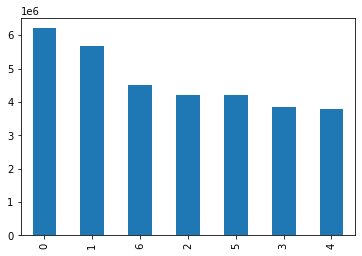

In [4]:
# create bar chart of day_dow
op_merged['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

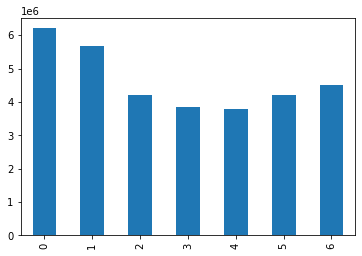

In [5]:
op_merged['order_dow'].value_counts().sort_index().plot.bar()

In [6]:
op_merged['order_dow'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_dow, dtype: int64

In [7]:
op_merged['order_dow'].value_counts().plot.bar(color = ['green'])

<AxesSubplot:>

In [8]:
bar = op_merged['order_dow'].value_counts().plot.bar(color = ['green'])
bar.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_orders_dow.png')

<AxesSubplot:ylabel='Frequency'>

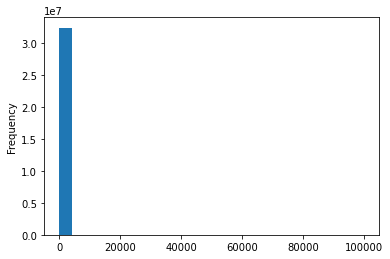

In [9]:
# creat a histogram for prices
op_merged['prices'].plot.hist(bins = 25)

In [10]:
# find out the abnormal data
op_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

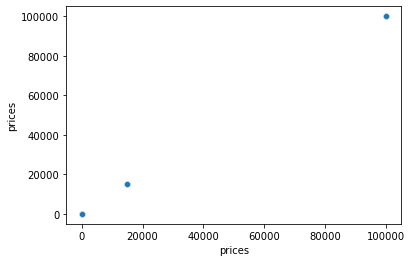

In [11]:
# create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = op_merged)

In [12]:
# continue to find out abnormal data
prod_100 = op_merged.loc[op_merged['prices'] > 100]

In [13]:
prod_100['prices'].value_counts()

14900.0    4429
99999.0     698
Name: prices, dtype: int64

In [14]:
# treat the outliners as missing
op_merged.loc[op_merged['prices'] > 100, 'prices'] = np.nan

In [15]:
op_merged['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [16]:
op_merged.to_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_inner_4.9.pkl')

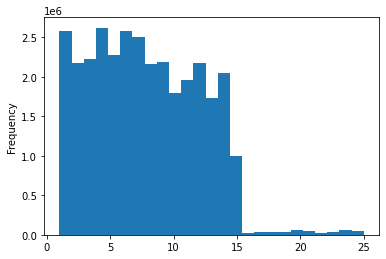

In [17]:
# creat a histogram with new data
hist = op_merged['prices'].plot.hist(bins = 25)

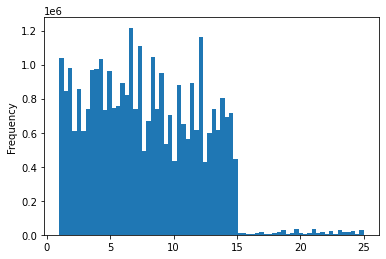

In [18]:
hist2 = op_merged['prices'].plot.hist(bins = 70)

In [19]:
hist.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/hist_prices.png')
hist2.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/hist2_prices.png')

In [20]:
# create a line chart
# sampling data
np.random.seed(4)
dev = np.random.rand(len(op_merged)) <= 0.7

In [21]:
# store 70% data in df big
big = op_merged[dev]

In [22]:
# store 30% data in df small
small = op_merged[~dev]

In [23]:
len(op_merged)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
small.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_number                  int64
loyalty_flag               object
user_purchased_mean       float64
spender_flag               object
median_days_spo           float64
order_frq_flag             object
dtype: object

In [26]:
dev.dtype

dtype('bool')

In [27]:
df_2 = small[['order_dow', 'prices']]

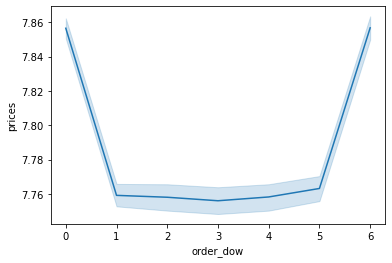

In [28]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

# Question 1: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

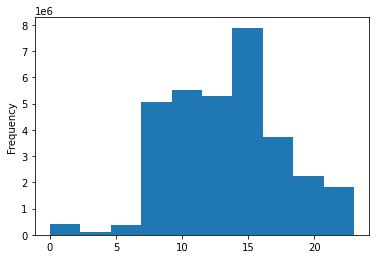

In [48]:
hist_order_hour_day = op_merged['order_hour_of_day'].plot.hist()

From the histogram above, we can see the busiest hours are from around 7am to 4pm. Most customers are shopping and active in that time. However, we have slow sales at midnight to dawn, which makes sense, since most people sleep at that time.

# Question 2: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

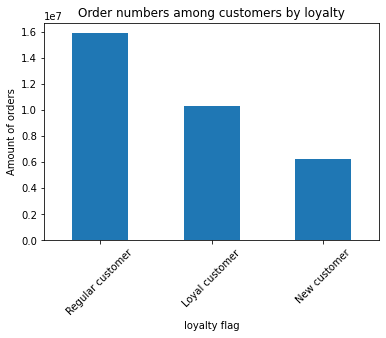

In [37]:
bar_loy_flag_1 = op_merged['loyalty_flag'].value_counts().plot.bar(ylabel='Amount of orders', xlabel='loyalty flag', title='Order numbers among customers by loyalty')
plt.xticks(rotation=45)


In [38]:
bar_loy_flag_1.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/bar_loy_flag_1.png', bbox_inches = 'tight')

# Question 3: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [32]:
# since line chart is a better choice for this question, we are going to use the sampling data(small df, 30% of whole data) we made above.
df_3 = small[['order_hour_of_day', 'prices']]

In [33]:
line_3 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

It seems that customers are likely to spend more at midnight to dawn. However, in that time zone, we can see a larger error bands. Also, the peak and trough are not significantly different. Therefore, we can say that there is no sigficant difference in expenditure depending on the hour of the day.

# Question 4: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [34]:
# import the orders/customers dataframe
op_cust_merged = pd.read_pickle(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl')

In [35]:
# sample the data to create a line chart
np.random.seed(4)
dev = np.random.rand(len(op_cust_merged)) <= 0.7

In [36]:
# store 70% of data in big dataframe
big = op_cust_merged[dev]

In [37]:
# store 30% of data in small dataframe
small = op_cust_merged[~dev]

In [38]:
op_cust_merged.shape

(32404859, 18)

In [39]:
len(big) + len(small)

32404859

In [40]:
small.head(10)

order_id  user_id  product_id product_name  prices    busiest_days  \
0    2539329        1         196         Soda     9.0  Regularly busy   
2     473747        1         196         Soda     9.0      Least busy   
3    2254736        1         196         Soda     9.0      Least busy   
6     550135        1         196         Soda     9.0    Busiest days   
10   2968173       15         196         Soda     9.0    Busiest days   
12   1911383       15         196         Soda     9.0  Regularly busy   
13   2715276       15         196         Soda     9.0    Busiest days   
19   1593000       31         196         Soda     9.0      Least busy   
21   2580647       43         196         Soda     9.0      Least busy   
22   2187180       43         196         Soda     9.0      Least busy   

        loyalty_flag  user_purchased_mean spender_flag  median_days_spo  \
0       New customer             6.367797  Low spender             20.5   
2       New customer             6.367797  Low spender             20.5   
3       New customer             6.367797  Low spender             20.5   
6       New customer             6.367797  Low spender             20.5   
10  Regular customer             3.980556  Low spender             10.0   
12  Regular customer             3.980556  Low spender             10.0   
13  Regular customer             3.980556  Low spender             10.0   
19  Regular customer             8.137793  Low spender              6.0   
21  Regular customer             7.444898  Low spender             10.0   
22  Regular customer             7.444898  Low spender             10.0   

           order_frq_flag  gender      state  age  n_dependants  \
0   Non-frequent customer  Female    Alabama   31             3   
2   Non-frequent customer  Female    Alabama   31             3   
3   Non-frequent customer  Female    Alabama   31             3   
6   Non-frequent customer  Female    Alabama   31             3   
10      Frequent customer  Female    Indiana   69             0   
12      Frequent customer  Female    Indiana   69             0   
13      Frequent customer  Female    Indiana   69             0   
19      Frequent customer  Female   Oklahoma   38             1   
21      Frequent customer  Female  Tennessee   41             1   
22      Frequent customer  Female  Tennessee   41             1   

          fam_status  income _merge  
0            married   40423   both  
2            married   40423   both  
3            married   40423   both  
6            married   40423   both  
10  divorced/widowed   54313   both  
12  divorced/widowed   54313   both  
13  divorced/widowed   54313   both  
19           married   52311   both  
21           married  123723   both  
22           married  123723   both

In [42]:
df_ad = small[['age', 'n_dependants']]

In [43]:
line_age_dep = sns.lineplot(data = df_ad, x = 'age', y = 'n_dependants')

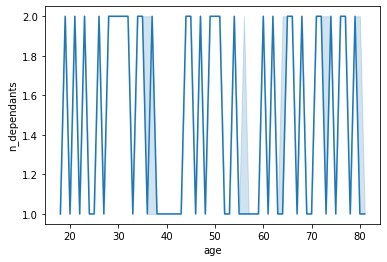

In [45]:
line_age_dep_median = sns.lineplot(data = df_ad, x = 'age', y = 'n_dependants', estimator = np.median)

From the graphs above, there is no clear trend about means and medians of numbers of dependants in different age.

# Question 5: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [46]:
df_ai = small[['age', 'income']]

In [47]:
scatp = sns.scatterplot(data = df_ai, x = 'age', y = 'income')

From the scatterplot above, we can see spending power is somehow related to age. Before 40-year-old, income of majority is below 200,000. High-paid income is below 400,000. After 40-year-old, majority has below 300,000 income. High-paid is below 600,000.

In [51]:
# export graphs
line.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/line_order_dow_prices.png')
hist_order_hour_day.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/hist_order_hour_of_day.png')
line_3.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/line_orderhourofday_prices.png')
line_age_dep.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/line_age_dependants_mean.png')
line_age_dep_median.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/line_age_dependants_median.png')
scatp.figure.savefig(r'/Users/r1121/Desktop/07-2023 Instacart Basket Analysis/04 Analysis/Vis/scatp_age_income.png')